In [1672]:
# Dependencies
import requests
import json
import pandas as pd

In [1673]:
# URL for GET requests to retrieve Star Wars character data
MedianHomeValueSqf = "Data Source/MedianHomeValuePerSqf_samples.csv"
Inventory_file = "Data Source/InventoryMeasure_zipCode_samples.csv"
City_MedianHomeValueSqf = "Data Source/City_MedianValuePerSqft_AllHomes.csv"
Inventory_County_file = "Data Source/Inventory.csv"
MedianHomeValueSqf_county = "Data Source/County_MedianValuePerSqft.csv"

In [1603]:
# Read and display the CSV with Pandas
City_MedianHomeValueSqf = pd.read_csv(City_MedianHomeValueSqf)

In [1604]:
ZipCode_MedianHomeValueSqf = pd.read_csv(MedianHomeValueSqf)

In [1605]:
Inventory_County = pd.read_csv(Inventory_County_file)

In [1674]:
MedianHomeValueSqf_county = pd.read_csv(MedianHomeValueSqf_county)

In [1606]:
stacked_ZipCode_MedianHomeValueSqf = ZipCode_MedianHomeValueSqf.melt(id_vars=['regionid','regionname','city','state','metro','countyname','sizerank'])

In [1607]:
SanDiego_ZipCode_MedianHomeValueSqf=stacked_ZipCode_MedianHomeValueSqf.loc[(stacked_ZipCode_MedianHomeValueSqf.city=='San Diego')&(stacked_ZipCode_MedianHomeValueSqf.state=='CA')]

In [1608]:
SanDiego_ZipCode_MedianHomeValueSqf['date'] = pd.to_datetime(SanDiego_ZipCode_MedianHomeValueSqf['variable'])
SanDiego_ZipCode_MedianHomeValueSqf['year'], SanDiego_ZipCode_MedianHomeValueSqf['month'] = SanDiego_ZipCode_MedianHomeValueSqf['date'].dt.year, SanDiego_ZipCode_MedianHomeValueSqf['date'].dt.month

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1611]:
# Read and display the CSV with Pandas
Inventory_file = pd.read_csv(Inventory_file)

In [1677]:
MedianHomeValueSqf_county.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
0,3101,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,6,37,1,114.0,114.0,113.0,...,399,402,405,409,413,417,419,420,420,421
1,139,Cook,IL,Chicago,17,31,2,102.0,103.0,104.0,...,158,159,160,161,162,164,164,165,165,165
2,1090,Harris,TX,Houston,48,201,3,51.0,51.0,51.0,...,92,93,93,94,94,95,96,96,96,97
3,2402,Maricopa,AZ,Phoenix,4,13,4,62.0,62.0,62.0,...,143,144,145,146,147,149,150,150,151,152
4,2841,San Diego,CA,San Diego,6,73,5,104.0,104.0,103.0,...,350,353,356,358,361,365,368,368,368,367


In [1678]:
stacked_city_MedianHomeValueSqf = MedianHomeValueSqf_county.melt(id_vars=['RegionID','RegionName','State','Metro','StateCodeFIPS','SizeRank','MunicipalCodeFIPS'])

In [1679]:
SanDiego_city_MedianHomeValueSqf=stacked_city_MedianHomeValueSqf.loc[(stacked_city_MedianHomeValueSqf.RegionName=='San Diego')&(stacked_city_MedianHomeValueSqf.State=='CA')]

In [1680]:
SanDiego_city_MedianHomeValueSqf['date'] = pd.to_datetime(SanDiego_city_MedianHomeValueSqf['variable'])
SanDiego_city_MedianHomeValueSqf['year'], SanDiego_city_MedianHomeValueSqf['month'] = SanDiego_city_MedianHomeValueSqf['date'].dt.year, SanDiego_city_MedianHomeValueSqf['date'].dt.month

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1681]:
SanDiego_city_MedianHomeValueSqf_yearly = SanDiego_city_MedianHomeValueSqf.groupby(['year','RegionName'])['value'].mean()
SanDiego_city_MedianHomeValueSqf_yearly.head()

year  RegionName
1996  San Diego     102.555556
1997  San Diego     105.166667
1998  San Diego     116.333333
1999  San Diego     129.500000
2000  San Diego     150.666667
Name: value, dtype: float64

In [1682]:
SanDiego_city_MedianHomeValueSqf_yearly = SanDiego_city_MedianHomeValueSqf_yearly.reset_index()
SanDiego_city_MedianHomeValueSqf_yearly.head()

,year,RegionName,value
0,1996,San Diego,102.555556
1,1997,San Diego,105.166667
2,1998,San Diego,116.333333
3,1999,San Diego,129.500000
4,2000,San Diego,150.666667


In [1683]:
Inventory_county = \
Inventory_County.melt(id_vars=['RegionName','RegionType','CountyName','Metro','StateFullName','DataTypeDescription'])

In [1684]:
Inventory_county.head()

,RegionName,RegionType,CountyName,Metro,StateFullName,DataTypeDescription,variable,value
0,Los Angeles,County,Los Angeles,Los Angeles-Long Beach-Anaheim,California,All Homes,2010-01,30118
1,Cook,County,Cook,Chicago,Illinois,All Homes,2010-01,29776
2,Harris,County,Harris,Houston,Texas,All Homes,2010-01,23940
3,Maricopa,County,Maricopa,Phoenix,Arizona,All Homes,2010-01,31302
4,San Diego,County,San Diego,San Diego,California,All Homes,2010-01,10907


In [1685]:
SanDiego_Inventory_county=Inventory_county.loc[Inventory_county.CountyName=='San Diego']

In [1686]:
SanDiego_Inventory_county['date'] = \
pd.to_datetime(SanDiego_Inventory_county['variable'])
SanDiego_Inventory_county['year'], SanDiego_Inventory_county['month'] =\
SanDiego_Inventory_county['date'].dt.year, SanDiego_Inventory_county['date'].dt.month

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1687]:
SanDiego_Inventory_county.head()

,RegionName,RegionType,CountyName,Metro,StateFullName,DataTypeDescription,variable,value,date,year,month
4,San Diego,County,San Diego,San Diego,California,All Homes,2010-01,10907,2010-01-01,2010,1
1760,San Diego,County,San Diego,San Diego,California,All Homes,2010-02,10908,2010-02-01,2010,2
3516,San Diego,County,San Diego,San Diego,California,All Homes,2010-03,12244,2010-03-01,2010,3
5272,San Diego,County,San Diego,San Diego,California,All Homes,2010-04,12512,2010-04-01,2010,4
7028,San Diego,County,San Diego,San Diego,California,All Homes,2010-05,12700,2010-05-01,2010,5


In [1690]:
SanDiego_Inventory_county_yearly = SanDiego_Inventory_county.groupby(['year']).mean()
SanDiego_Inventory_county_yearly.reset_index(inplace = True)
SanDiego_Inventory_county_yearly.head(10)

,year,value,month
0,2010,14021.833333,6.5
1,2011,17094.083333,6.5
2,2012,11248.750000,6.5
3,2013,7565.083333,6.5
4,2014,8402.500000,6.5
5,2015,6526.333333,6.5
6,2016,6582.000000,6.5
7,2017,5001.500000,6.5
8,2018,5171.666667,3.5


In [1515]:
SanDiego_Inventory=Inventory.loc[Inventory.city=='San Diego']

In [1516]:
SanDiego_Inventory.head()

,regionname,regiontype,city,countyname,metro,statefullname,datatypedescription,variable,value
9,92109,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,247
10,92101,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,436
21,92115,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,175
22,92154,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,175
23,92122,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,112


In [1517]:
SanDiego_Inventory['date'] = pd.to_datetime(SanDiego_Inventory['variable'])
SanDiego_Inventory['year'], SanDiego_Inventory['month'] = SanDiego_Inventory['date'].dt.year, SanDiego_Inventory['date'].dt.month

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1548]:
SanDiego_Inventory.head()

,regionname,regiontype,city,countyname,metro,statefullname,datatypedescription,variable,value,date,year,month
9,92109,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,247,2010-01-01,2010,1
10,92101,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,436,2010-01-01,2010,1
21,92115,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,175,2010-01-01,2010,1
22,92154,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,175,2010-01-01,2010,1
23,92122,Zip,San Diego,San Diego,San Diego,California,All Homes,2010-01,112,2010-01-01,2010,1


In [1549]:
SanDiego_Inventory_yearly = SanDiego_Inventory.groupby(['year']).sum()
SanDiego_Inventory_yearly.reset_index(inplace = True)
#SanDiego_Inventory_yearly = SanDiego_Inventory_yearly['value']/12
#SanDiego_Inventory_yearly.loc['value']
SanDiego_Inventory_yearly['year','value']

,year,regionname,value,month
0,2010,23212908,52530,1638
1,2011,23212908,62293,1638
2,2012,23212908,39623,1638
3,2013,23212908,27174,1638
4,2014,23212908,29459,1638
5,2015,23212908,23156,1638
6,2016,23212908,22800,1638
7,2017,23212908,16732,1638
8,2018,11606454,9652,441


In [1781]:
SanDiego_Inventory_yearly['value']

0    4377.500000
1    5191.083333
2    3301.916667
3    2264.500000
4    2454.916667
5    1929.666667
6    1900.000000
7    1394.333333
8     804.333333
Name: value, dtype: float64

In [1550]:
SanDiego_Inventory_yearly['value'] = SanDiego_Inventory_yearly['value']/12
(SanDiego_Inventory_yearly.iloc[[8],[-2]])*2
SanDiego_Inventory_yearly.head(10)

,year,regionname,value,month
0,2010,23212908,4377.500000,1638
1,2011,23212908,5191.083333,1638
2,2012,23212908,3301.916667,1638
3,2013,23212908,2264.500000,1638
4,2014,23212908,2454.916667,1638
5,2015,23212908,1929.666667,1638
6,2016,23212908,1900.000000,1638
7,2017,23212908,1394.333333,1638
8,2018,11606454,804.333333,441


In [1691]:
file1 = "Data Source/estimate_2010.csv" 
file2 = "Data Source/estimate_2011.csv" 
file3 = "Data Source/estimate_2012.csv" 
file4 = "Data Source/estimate_2013.csv" 
file5 = "Data Source/estimate_2014.csv" 
file6 = "Data Source/estimate_2015.csv" 
file7 = "Data Source/estimate_2016.csv"

file1 = "Data Source/estimate_2010.csv"
file2 = "Data Source/estimate_2011.csv"
file3 = "Data Source/estimate_2012.csv"
file4 = "Data Source/estimate_2013.csv"
file5 = "Data Source/estimate_2014.csv"
file6 = "Data Source/estimate_2015.csv"
file7 = "Data Source/estimate_2016.csv"

In [1692]:
filenames = [file1,file2,file3,file4,file5,file6,file7]
Population_detail = pd.concat( [ pd.read_csv(f) for f in filenames ])

In [1693]:
Population_Summary = Population_detail.groupby(['ZIP','YEAR']).sum()

In [1694]:
Population_Summary = Population_Summary.reset_index()

In [1695]:
Population_Summary_yearly = Population_detail.groupby(['YEAR']).sum()
Population_Summary_yearly.reset_index(inplace = True)
Population_Summary_yearly.head()

,YEAR,ZIP,POPULATION
0,2010,187253766,3095313
1,2011,187253766,3120688
2,2012,187253766,3153951
3,2013,187253766,3194778
4,2014,187253766,3230278


In [1696]:
MortgageRate = "Data Source/MortgageRate.xlsx"
MortgageRate = pd.read_excel(MortgageRate)

In [1697]:
MortgageRate['Date'] = MortgageRate['Week'].dt.strftime("%Y-%m")

In [1698]:
MortgageRate['year'] = MortgageRate['Week'].dt.strftime("%Y")

In [1699]:
Mortgage_yearly = MortgageRate.groupby(['year']).mean()
Mortgage_yearly.reset_index(inplace = True)
Mortgage_yearly['year'] = Mortgage_yearly['year'].astype(str).astype(int)

In [1700]:
Sqf_Mortgage_zipcode = pd.merge(SanDiego_ZipCode_MedianHomeValueSqf_yearly,Mortgage_yearly,how='inner',
                        left_on ='year', right_on = 'year')
Sqf_Mortgage_zipcode['regionname'] = Sqf_Mortgage_zipcode['regionname'].astype(int)
Sqf_Mortgage_zipcode.head()

,year,regionname,value,30 years
0,1996,92037,176.111111,7.806154
1,1996,92101,138.444444,7.806154
2,1996,92102,90.666667,7.806154
3,1996,92103,126.444444,7.806154
4,1996,92104,99.777778,7.806154


In [1701]:
population_Sqf_Mortgage_zipcode = pd.merge(Sqf_Mortgage_zipcode,Population_Summary,how='inner',\
left_on =('year','regionname'), right_on = ('YEAR','ZIP'))
population_Sqf_Mortgage_zipcode.dtypes

year            int64
regionname      int64
value         float64
30 years      float64
ZIP             int64
YEAR            int64
POPULATION      int64
dtype: object

In [1702]:
population_Sqf_Mortgage_zipcode['regionname'] = population_Sqf_Mortgage_zipcode['regionname'].astype(int)

In [1703]:
Sqf_Mortgage_population_inventory_zipcode = pd.merge(population_Sqf_Mortgage_zipcode,SanDiego_Inventory_zipcode_yearly,how='inner',\
left_on = ('year','regionname'), right_on = ('year','regionname'))


In [1704]:
Sqf_Mortgage_population_inventory_zipcode.head()
Sqf_Mortgage_population_inventory_zipcode.dropna()

,year,regionname,value_x,30 years,ZIP,YEAR,POPULATION,value_y,month
0,2010,92037,474.916667,4.689808,92037,2010,38652,5742,78
1,2010,92101,384.750000,4.689808,92101,2010,35623,6307,78
2,2010,92103,369.500000,4.689808,92103,2010,30680,2667,78
3,2010,92106,416.333333,4.689808,92106,2010,21847,1655,78
4,2010,92107,448.416667,4.689808,92107,2010,26929,1490,78
5,2010,92109,428.750000,4.689808,92109,2010,45802,3903,78
6,2010,92110,295.416667,4.689808,92110,2010,23852,1400,78
7,2010,92111,274.416667,4.689808,92111,2010,47870,1655,78
8,2010,92114,178.333333,4.689808,92114,2010,65433,2179,78
9,2010,92115,245.166667,4.689808,92115,2010,56694,2516,78


In [1705]:
Sqf_Mortgage_population_inventory_zipcode = Sqf_Mortgage_population_inventory_zipcode.rename(columns = {"year":"year",
                               "regionname": "City",
                               "value_x":"Price_for_Square_Feet",
                             "30 years":"Mortgage_Rate_30_years",
                              "ZIP" : "Zip",                                                        ''
                             "POPULATION" :"Population",             
                             "value_y" : "Inventory"
})


In [1706]:
Sqf_Mortgage = pd.merge(SanDiego_city_MedianHomeValueSqf_yearly,Mortgage_yearly,how='outer',
                        left_on ='year', right_on = 'year')
Sqf_Mortgage['regionname'] = Sqf_Mortgage_zipcode['regionname'].astype(int)
Sqf_Mortgage.head()

,year,RegionName,value,30 years,regionname
0,1996,San Diego,102.555556,7.806154,92037
1,1997,San Diego,105.166667,7.598846,92101
2,1998,San Diego,116.333333,6.942642,92102
3,1999,San Diego,129.500000,7.440000,92103
4,2000,San Diego,150.666667,8.053462,92104


In [1707]:
population_Sqf_Mortgage = pd.merge(Sqf_Mortgage,Population_Summary_yearly,how='outer',
left_on ='year', right_on = 'YEAR')
population_Sqf_Mortgage.head()

,year,RegionName,value,30 years,regionname,YEAR,ZIP,POPULATION
0,1996,San Diego,102.555556,7.806154,92037,NaN,NaN,NaN
1,1997,San Diego,105.166667,7.598846,92101,NaN,NaN,NaN
2,1998,San Diego,116.333333,6.942642,92102,NaN,NaN,NaN
3,1999,San Diego,129.500000,7.440000,92103,NaN,NaN,NaN
4,2000,San Diego,150.666667,8.053462,92104,NaN,NaN,NaN


In [1708]:
Sqf_Mortgage_population_inventory = pd.merge(population_Sqf_Mortgage,SanDiego_Inventory_county_yearly,how='outer',\
left_on = ('year'), right_on = ('year'))
Sqf_Mortgage_population_inventory.head()

,year,RegionName,value_x,30 years,regionname,YEAR,ZIP,POPULATION,value_y,month
0,1996,San Diego,102.555556,7.806154,92037,NaN,NaN,NaN,NaN,NaN
1,1997,San Diego,105.166667,7.598846,92101,NaN,NaN,NaN,NaN,NaN
2,1998,San Diego,116.333333,6.942642,92102,NaN,NaN,NaN,NaN,NaN
3,1999,San Diego,129.500000,7.440000,92103,NaN,NaN,NaN,NaN,NaN
4,2000,San Diego,150.666667,8.053462,92104,NaN,NaN,NaN,NaN,NaN


In [1709]:
Sqf_Mortgage_population_inventory = Sqf_Mortgage_population_inventory.rename(columns = {"year":"year",
                               "RegionName": "City",
                               "value_x":"Price_for_Square_Feet",
                             "30 years":"Mortgage_Rate_30_years",
                            "POPULATION" :"Population",             
                             "value_y" : "Inventory"
})
Sqf_Mortgage_population_inventory.head()

,year,City,Price_for_Square_Feet,Mortgage_Rate_30_years,regionname,YEAR,ZIP,Population,Inventory,month
0,1996,San Diego,102.555556,7.806154,92037,NaN,NaN,NaN,NaN,NaN
1,1997,San Diego,105.166667,7.598846,92101,NaN,NaN,NaN,NaN,NaN
2,1998,San Diego,116.333333,6.942642,92102,NaN,NaN,NaN,NaN,NaN
3,1999,San Diego,129.500000,7.440000,92103,NaN,NaN,NaN,NaN,NaN
4,2000,San Diego,150.666667,8.053462,92104,NaN,NaN,NaN,NaN,NaN


In [1710]:
columns = ['YEAR','ZIP','month']
Sqf_Mortgage_population_inventory.drop(columns, inplace=True, axis=1)
Sqf_Mortgage_population_inventory.head()

,year,City,Price_for_Square_Feet,Mortgage_Rate_30_years,regionname,Population,Inventory
0,1996,San Diego,102.555556,7.806154,92037,NaN,NaN
1,1997,San Diego,105.166667,7.598846,92101,NaN,NaN
2,1998,San Diego,116.333333,6.942642,92102,NaN,NaN
3,1999,San Diego,129.500000,7.440000,92103,NaN,NaN
4,2000,San Diego,150.666667,8.053462,92104,NaN,NaN


In [1711]:
Sqf_Mortgage_population_inventory = Sqf_Mortgage_population_inventory.sort_values(by='year', ascending=True)
Sqf_Mortgage_population_inventory = Sqf_Mortgage_population_inventory.set_index('year')
Sqf_Mortgage_population_inventory.head()
#Sqf_Mortgage_population_inventory['year']

,City,Price_for_Square_Feet,Mortgage_Rate_30_years,regionname,Population,Inventory
year,,,,,,
1971,NaN,NaN,7.541750,92126,NaN,NaN
1972,NaN,NaN,7.383269,92127,NaN,NaN
1973,NaN,NaN,8.044808,92128,NaN,NaN
1974,NaN,NaN,9.187115,92129,NaN,NaN
1975,NaN,NaN,9.047115,92130,NaN,NaN


In [1712]:
import matplotlib.pyplot as plt
import numpy as np

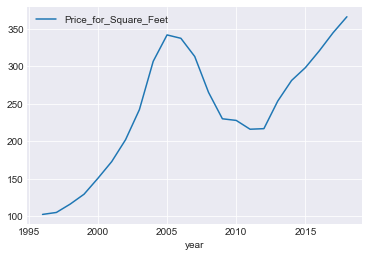

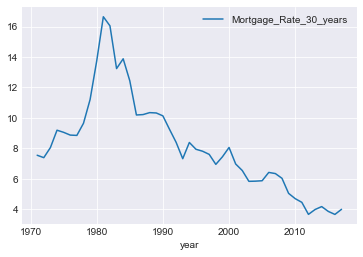

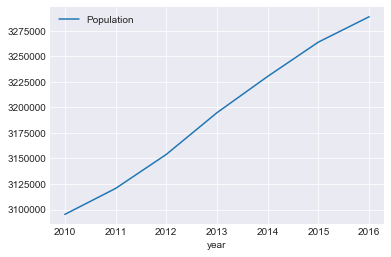

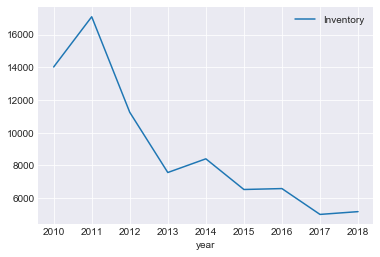

In [1713]:
df1 = pd.DataFrame(Sqf_Mortgage_population_inventory, columns = (['Price_for_Square_Feet']))
df2 = pd.DataFrame(Sqf_Mortgage_population_inventory, columns = (['Mortgage_Rate_30_years']))
df3 = pd.DataFrame(Sqf_Mortgage_population_inventory, columns = (['Population']))
df4 = pd.DataFrame(Sqf_Mortgage_population_inventory, columns = (['Inventory']))

plt1 = df1.plot()
df2.plot()
df3.plot()
df4.plot()

In [1787]:
Sqf_Mortgage_population_inventory['Mortgage_Rate_Modified_30_years'] = Sqf_Mortgage_population_inventory['Mortgage_Rate_30_years']*50
Sqf_Mortgage_population_inventory['Modified Population'] = Sqf_Mortgage_population_inventory['Population']/11138
Sqf_Mortgage_population_inventory['Modified Inventory'] = Sqf_Mortgage_population_inventory['Inventory']/40

Sqf_Mortgage_population_inventory.head()

,City,Price_for_Square_Feet,Mortgage_Rate_30_years,regionname,Population,Inventory,Mortgage_Rate_Modified_30_years,Modified Population,Modified Inventory
year,,,,,,,,,
1971,NaN,NaN,7.541750,92126,NaN,NaN,377.087500,NaN,NaN
1972,NaN,NaN,7.383269,92127,NaN,NaN,369.163462,NaN,NaN
1973,NaN,NaN,8.044808,92128,NaN,NaN,402.240385,NaN,NaN
1974,NaN,NaN,9.187115,92129,NaN,NaN,459.355769,NaN,NaN
1975,NaN,NaN,9.047115,92130,NaN,NaN,452.355769,NaN,NaN


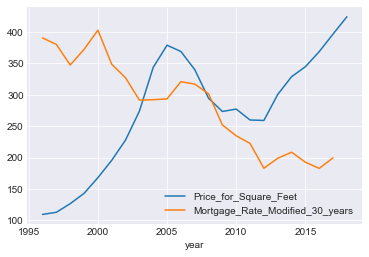

In [1645]:
df = pd.DataFrame(Sqf_Mortgage_population_inventory[25:48], columns = ('Price_for_Square_Feet','Mortgage_Rate_Modified_30_years'))                                                            
df.plot()


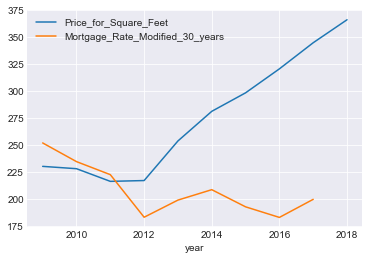

In [1720]:
df = pd.DataFrame(Sqf_Mortgage_population_inventory[38:48], columns = ('Price_for_Square_Feet','Mortgage_Rate_Modified_30_years'))                                                            
df.plot()

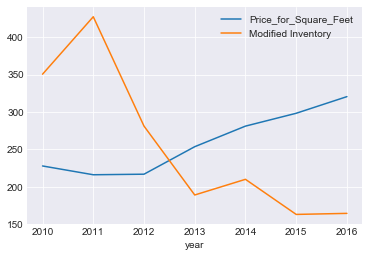

In [1721]:
df = pd.DataFrame(Sqf_Mortgage_population_inventory[39:46], columns = ('Price_for_Square_Feet','Modified Inventory'))                                                             
df.plot()

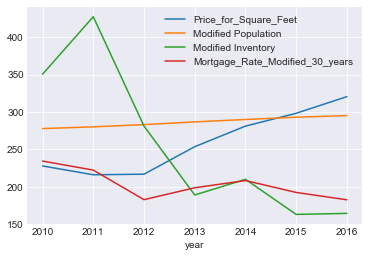

In [1723]:
df = pd.DataFrame(Sqf_Mortgage_population_inventory[39:46], columns = ('Price_for_Square_Feet','Modified Population','Modified Inventory',
                                                                      'Mortgage_Rate_Modified_30_years'))                                                             
df.plot()

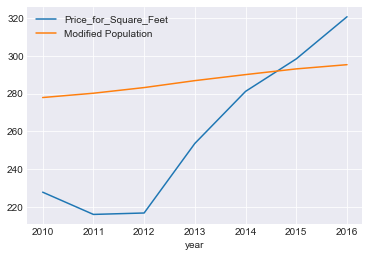

In [1724]:
df = pd.DataFrame(Sqf_Mortgage_population_inventory[39:46], columns = ('Price_for_Square_Feet','Modified Population'))                                                           
df.plot()

In [1725]:
# Dependencies
from scipy.stats import linregress

In [1726]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import sklearn
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [1743]:
housing_model_MortgaeRate = ols("""Price_for_Square_Feet ~ Mortgage_Rate_30_years""", data=Sqf_Mortgage_population_inventory).fit()
# summarize our model
housing_model_MortgageRate_summary = housing_model_MortgaeRate.summary()
#HTML(housing_model_summary.as_html())

In [1744]:
housing_model_MortgageRate_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price_for_Square_Feet   R-squared:                       0.387
Model:                               OLS   Adj. R-squared:                  0.356
Method:                    Least Squares   F-statistic:                     12.62
Date:                   Tue, 21 Aug 2018   Prob (F-statistic):            0.00200
Time:                           15:55:43   Log-Likelihood:                -121.56
No. Observations:                     22   AIC:                             247.1
Df Residuals:                         20   BIC:                             249.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                428.0561     55.941      7.652      0.000     311.365     544.747
Mortgage_Rate_30_years   -33.8968      9.541     -3.553      0.002     -53.799     -13.994
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.743
Skew:                           0.615   Prob(JB):                        0.418
Kurtosis:                       2.378   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

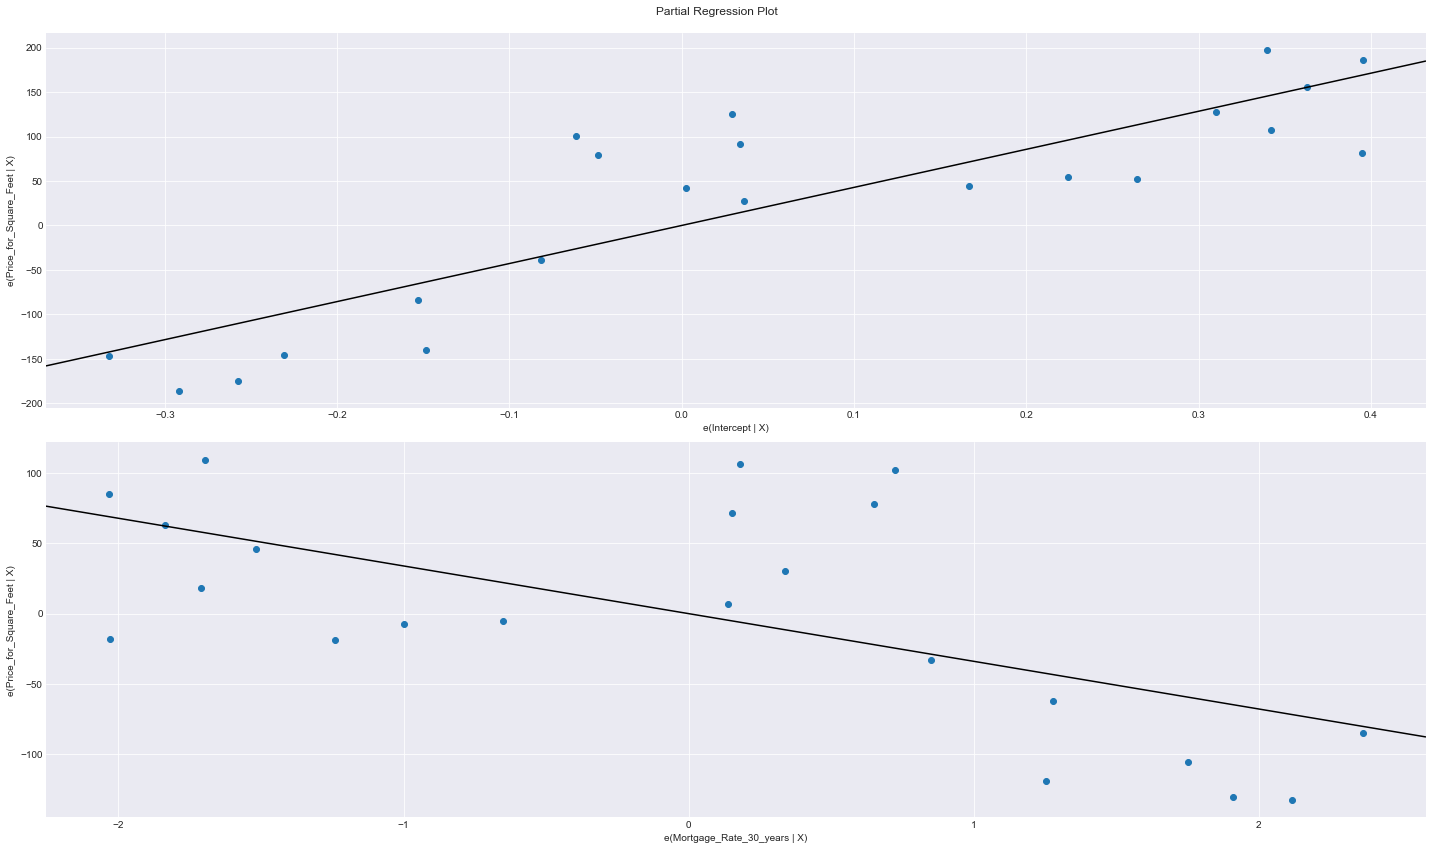

In [1745]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model_MortgaeRate, fig=fig)

In [1746]:
X_new = [[3.9898], [4.53]]

sqf_test= pd.DataFrame(X_new,columns=['Mortgage_Rate_30_years'])

sqf_2017 = print(sqf_test['Mortgage_Rate_30_years'][0]*(-33.8968) + 428.0561)
sqf_2018 = print(sqf_test['Mortgage_Rate_30_years'][1]*(-33.8968) + 428.0561)


292.81464736000004
274.503596


In [1755]:
housing_model_MortgaeRate_v2 = ols("""Price_for_Square_Feet ~ Mortgage_Rate_30_years""", data=Sqf_Mortgage_population_inventory[25:38]).fit()
# summarize our model
housing_model_MortgageRate_summary_v2 = housing_model_MortgaeRate_v2.summary()
#HTML(housing_model_summary.as_html())

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [1756]:
housing_model_MortgageRate_summary_v2

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price_for_Square_Feet   R-squared:                       0.697
Model:                               OLS   Adj. R-squared:                  0.669
Method:                    Least Squares   F-statistic:                     25.26
Date:                   Tue, 21 Aug 2018   Prob (F-statistic):           0.000386
Time:                           16:08:34   Log-Likelihood:                -68.870
No. Observations:                     13   AIC:                             141.7
Df Residuals:                         11   BIC:                             142.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                868.9410    131.063      6.630      0.000     580.472    1157.410
Mortgage_Rate_30_years   -97.0840     19.317     -5.026      0.000    -139.600     -54.568
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.636
Skew:                           0.352   Prob(JB):                        0.728
Kurtosis:                       2.178   Cond. No.                         62.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
housing_model_MortgaeRate_v2

In [1757]:
X_new = [[3.9898], [4.53]]

sqf_test= pd.DataFrame(X_new,columns=['Mortgage_Rate_30_years'])

sqf_2017 = print(sqf_test['Mortgage_Rate_30_years'][0]*(-97.0840) + 868.9410)
sqf_2018 = print(sqf_test['Mortgage_Rate_30_years'][1]*(-97.0840) + 868.9410)

481.5952568
429.15048


In [1760]:
housing_model_MortgaeRate_v3 = ols("""Price_for_Square_Feet ~ Mortgage_Rate_30_years""", data=Sqf_Mortgage_population_inventory[38:46]).fit()
# summarize our model
housing_model_MortgageRate_summary_v3 = housing_model_MortgaeRate_v3.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [1762]:
housing_model_MortgageRate_summary_v3

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price_for_Square_Feet   R-squared:                       0.281
Model:                               OLS   Adj. R-squared:                  0.161
Method:                    Least Squares   F-statistic:                     2.346
Date:                   Tue, 21 Aug 2018   Prob (F-statistic):              0.176
Time:                           16:10:42   Log-Likelihood:                -38.999
No. Observations:                      8   AIC:                             82.00
Df Residuals:                          6   BIC:                             82.16
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                432.1569    115.988      3.726      0.010     148.345     715.969
Mortgage_Rate_30_years   -42.1860     27.542     -1.532      0.176    -109.578      25.206
==============================================================================
Omnibus:                        0.804   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.516
Skew:                          -0.525   Prob(JB):                        0.773
Kurtosis:                       2.331   Cond. No.                         39.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1763]:
X_new = [[3.9898], [4.53]]

sqf_test= pd.DataFrame(X_new,columns=['Mortgage_Rate_30_years'])

sqf_2017 = print(sqf_test['Mortgage_Rate_30_years'][0]*(-42.1860) + 432.1569)
sqf_2018 = print(sqf_test['Mortgage_Rate_30_years'][1]*(-42.1860) + 432.1569)

263.8431972
241.05432


In [1764]:
housing_model_Population = ols("""Price_for_Square_Feet ~ Population""", data=Sqf_Mortgage_population_inventory[39:46]).fit()
# summarize our model
housing_model_Population_summary = housing_model_Population.summary()
#HTML(housing_model_summary.as_html())

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [1765]:
housing_model_Population_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price_for_Square_Feet   R-squared:                       0.898
Model:                               OLS   Adj. R-squared:                  0.877
Method:                    Least Squares   F-statistic:                     43.90
Date:                   Tue, 21 Aug 2018   Prob (F-statistic):            0.00118
Time:                           16:12:53   Log-Likelihood:                -27.525
No. Observations:                      7   AIC:                             59.05
Df Residuals:                          5   BIC:                             58.94
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1471.8473    261.332     -5.632      0.002   -2143.623    -800.071
Population     0.0005   8.18e-05      6.626      0.001       0.000       0.001
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.228
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.038
Skew:                           0.023   Prob(JB):                        0.981
Kurtosis:                       2.640   Cond. No.                     1.51e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1771]:
X_new = [[3337685], [3337685*1.025]]

sqf_test= pd.DataFrame(X_new,columns=['Population'])

sqf_2017 = print(sqf_test['Population'][0]*(0.0005) - 1471.8473)
sqf_2018 = print(sqf_test['Population'][1]*(0.0005) - 1471.8473)

196.99520000000007
238.71626249999986


In [1772]:
housing_model_inventory = ols("""Price_for_Square_Feet ~ Inventory""", data=Sqf_Mortgage_population_inventory[39:48]).fit()
# summarize our model
housing_model_inventory_summary = housing_model_inventory.summary()
#HTML(housing_model_summary.as_html())

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [1768]:
housing_model_inventory_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price_for_Square_Feet   R-squared:                       0.740
Model:                               OLS   Adj. R-squared:                  0.703
Method:                    Least Squares   F-statistic:                     19.92
Date:                   Tue, 21 Aug 2018   Prob (F-statistic):            0.00293
Time:                           16:13:25   Log-Likelihood:                -42.404
No. Observations:                      9   AIC:                             88.81
Df Residuals:                          7   BIC:                             89.20
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    384.7350     25.446     15.120      0.000     324.566     444.904
Inventory     -0.0115      0.003     -4.463      0.003      -0.018      -0.005
==============================================================================
Omnibus:                        0.419   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.481
Skew:                          -0.287   Prob(JB):                        0.786
Kurtosis:                       2.023   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1773]:
X_new = [[5002], [5172]]

sqf_test= pd.DataFrame(X_new,columns=['Inventory'])

sqf_2017 = print(sqf_test['Inventory'][0]*(-0.0115) + 384.7350)
sqf_2018 = print(sqf_test['Inventory'][1]*(-0.0115) + 384.7350)

327.212
325.257


In [1733]:
Sqf_Mortgage_population_inventory[39:46]

,City,Price_for_Square_Feet,Mortgage_Rate_30_years,regionname,Population,Inventory,Mortgage_Rate_Modified_30_years,Modified Population,Modified Inventory
year,,,,,,,,,
2010,San Diego,227.916667,4.689808,92115,3095313.0,14021.833333,234.490385,277.905638,350.545833
2011,San Diego,216.166667,4.447885,92116,3120688.0,17094.083333,222.394231,280.183875,427.352083
2012,San Diego,216.916667,3.657500,92117,3153951.0,11248.750000,182.875000,283.170318,281.218750
2013,San Diego,253.666667,3.975577,92119,3194778.0,7565.083333,198.778846,286.835877,189.127083
2014,San Diego,281.166667,4.168868,92120,3230278.0,8402.500000,208.443396,290.023164,210.062500
2015,San Diego,298.333333,3.850577,92121,3263848.0,6526.333333,192.528846,293.037170,163.158333
2016,San Diego,320.583333,3.654038,92122,3288612.0,6582.000000,182.701923,295.260549,164.550000


In [1774]:
# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""Price_for_Square_Feet ~ 
                                              Population
                                            + Mortgage_Rate_30_years
                                            + Inventory""", data=Sqf_Mortgage_population_inventory[39:46]).fit()
# summarize our model
housing_model_summary = housing_model.summary()
#HTML(housing_model_summary.as_html())

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [1775]:
housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price_for_Square_Feet   R-squared:                       0.963
Model:                               OLS   Adj. R-squared:                  0.925
Method:                    Least Squares   F-statistic:                     25.74
Date:                   Tue, 21 Aug 2018   Prob (F-statistic):             0.0121
Time:                           16:17:22   Log-Likelihood:                -24.004
No. Observations:                      7   AIC:                             56.01
Df Residuals:                          3   BIC:                             55.79
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1969.1874    505.531     -3.895      0.030   -3578.013    -360.362
Population                 0.0007      0.000      4.474      0.021       0.000       0.001
Mortgage_Rate_30_years    39.5017     17.396      2.271      0.108     -15.861      94.864
Inventory                 -0.0009      0.003     -0.346      0.752      -0.009       0.007
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.414
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.889
Skew:                           0.622   Prob(JB):                        0.641
Kurtosis:                       1.775   Cond. No.                     3.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1776]:
X_new = [[3.9898,3337685,5002], [4.53,3337685,5172]]

sqf_test= pd.DataFrame(X_new,columns=['Mortgage_Rate_30_years',
                                      'Population',
                                      'Inventory'])
sqf_test.head()

,Mortgage_Rate_30_years,Population,Inventory
0,3.9898,3337685,5002
1,4.5300,3337685,5172


In [1784]:
sqf_2017 = print(sqf_test['Mortgage_Rate_30_years'][0]*(39.5017) + sqf_test['Population'][0]*(0.0007) + sqf_test['Inventory'][0]*(-0.0009) - 1969.1874)
sqf_2018 = print(sqf_test['Mortgage_Rate_30_years'][1]*(39.5017) + sqf_test['Population'][1]*(0.0007) + sqf_test['Inventory'][1]*(-0.0009) - 1969.1874)



520.2941826600002
541.4800010000001
